Dataset-5 has been used i.e. Visadataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [15]:
##read the file
data=pd.read_csv("D:/INEURON_DATA/Dataset/data5/Visadataset.csv")
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [16]:
data.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [18]:
## count the number of missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [19]:
#3count the number of unique values
data.nunique()
## in case of nan values 
data.nunique(dropna=False)


case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [21]:
# let's print the different unique labels
data['education_of_employee'].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [39]:
##to check for duplicate values
data.duplicated().sum()

0

Text(0.5, 1.0, 'cardinality')

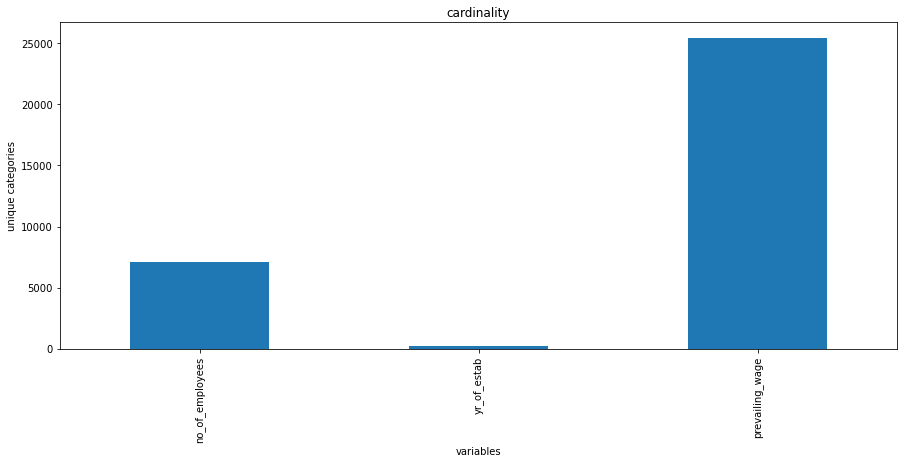

In [36]:
## we can plot the cardinaity of the variables
## for numerical data
data[['no_of_employees','yr_of_estab','prevailing_wage']].nunique().plot.bar(figsize=(15,6))
plt.xlabel('variables')
plt.ylabel('unique categories')
plt.title('cardinality')

Text(0.5, 1.0, 'cardinality')

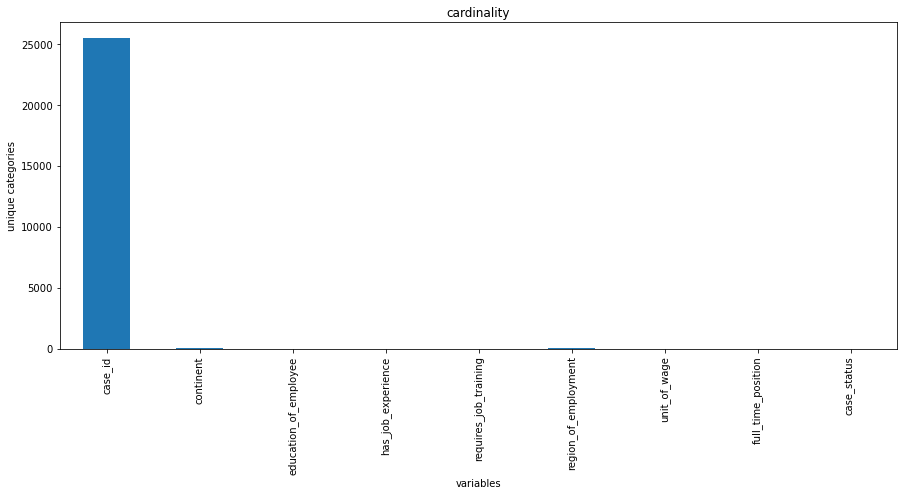

In [37]:
## for categorical data
data[['case_id', 'continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment', 'unit_of_wage', 'full_time_position','case_status']].nunique().plot.bar(figsize=(15,6))
plt.xlabel('variables')
plt.ylabel('unique categories')
plt.title('cardinality')

In [41]:
#identify the rare categories
### calculating the number of visas per continent in percentage
label_freq=data['continent'].value_counts()/len(data)
label_freq

Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64

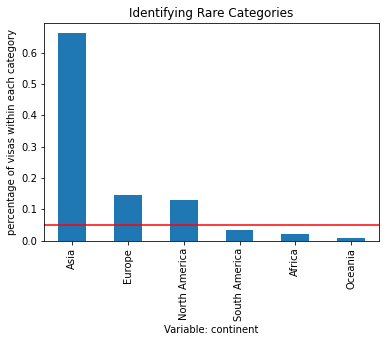

In [42]:
## show the bar plot of frequency of each category and highlight the rare category with red color
# let's make plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('percentage of visas within each category')
fig.set_xlabel('Variable: continent')
fig.set_title('Identifying Rare Categories')
plt.show()

In [43]:
##Linear relationship
## can be shown using scatter plot or residual plot
from sklearn.linear_model import LinearRegression

In [48]:
data['target']=(data['no_of_employees'] + data['yr_of_estab'] + data['prevailing_wage'])/3

In [49]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,target
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,5704.067633
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,29279.883333
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,56482.953333
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,28476.343333
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,50998.130000


Text(0.5, 21.70625000000002, 'no_of_employees')

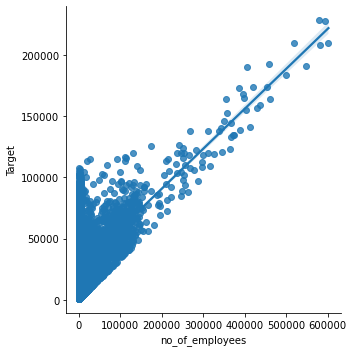

In [51]:
##3scatter plot for showing linear relationship
sns.lmplot(x="no_of_employees", y="target", data=data, order=1)
plt.ylabel('Target')
plt.xlabel('no_of_employees')

Text(0, 0.5, 'target')

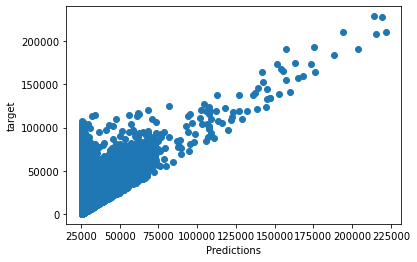

In [55]:
## Residual plot can also be used to show the linear relationship
## If the relationship is linear, the residuals should be normally distributed and centered around zero.
# now we do the same for the variable no_of_employees of visa dataset

# call the linear model from sklearn
linreg = LinearRegression()

# fit the mode
linreg.fit(data['no_of_employees'].to_frame(), data['target'])

# make the predictions
pred = linreg.predict(data['no_of_employees'].to_frame())

# calculate the residuals
error = data['no_of_employees'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=data['target'])
plt.xlabel('Predictions')
plt.ylabel('target')

Text(0.5, 0, 'no_of_employees')

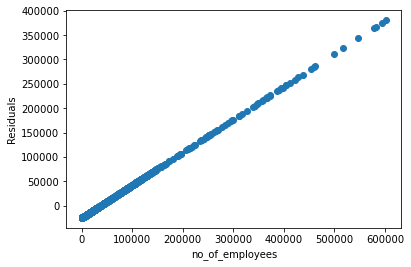

In [57]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=data['no_of_employees'])
plt.ylabel('Residuals')
plt.xlabel('no_of_employees')

C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_of_employees', ylabel='Density'>

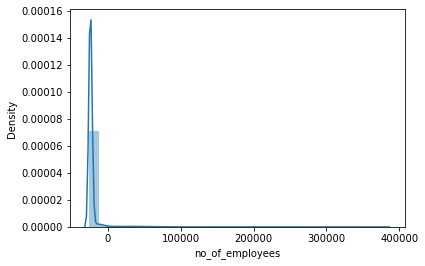

In [59]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)


# by seeing the graph we can make it out that the relation is not linear, and do not follow a gaussian distribution

C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_of_estab', ylabel='Density'>

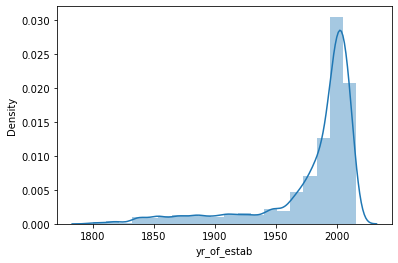

In [61]:
## normal Distribution
sns.distplot(data['yr_of_estab'], bins=20)

<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

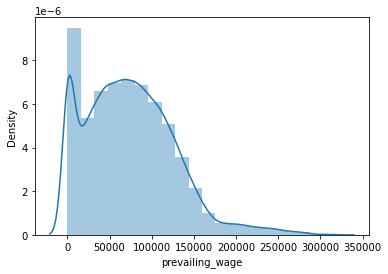

In [63]:
## normal Distribution
sns.distplot(data['prevailing_wage'], bins=20)

<IPython.core.display.Javascript object>

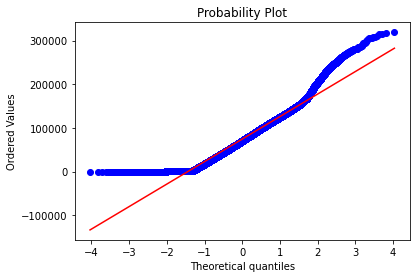

In [65]:
# let's plot the Q-Q plot for the simualted data.
# the dots should adjust to the 45 degree line

stats.probplot(data['prevailing_wage'], dist="norm", plot=plt)
plt.show()

# prevailing_wage does not follow a gaussian distribution as the observations deviate from the line.

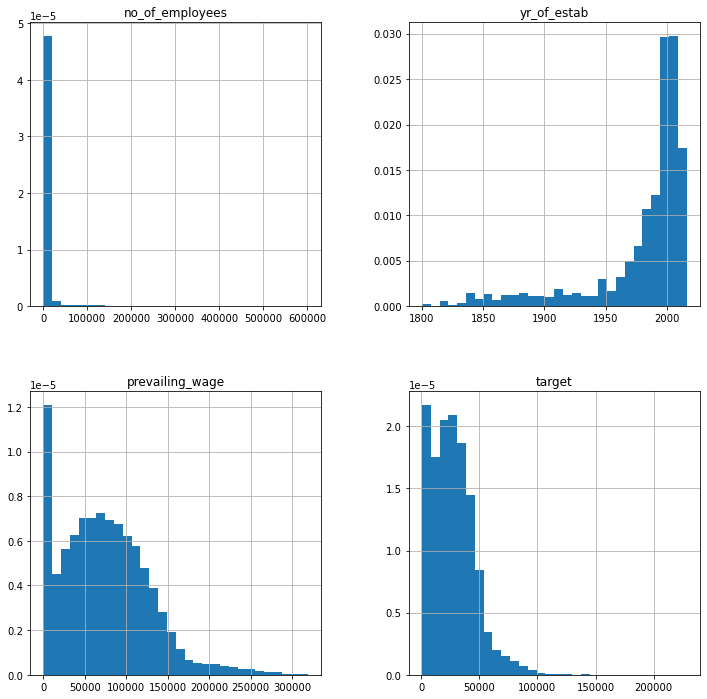

In [66]:
data.hist(bins=30, figsize=(12,12), density=True)
plt.show()

Highlighting the outliers
An outlier is a data point which is significantly different from the remaining data. 

we will identify outliers using boxplots and the inter-quantile range proximity rule.

According to the inter-quantile range proximity rule, a value is an outlier if it falls outside the below boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

where the inter-quantile range (IQR) is given by:

IQR = 75th quantile - 25th quantile

Text(0.5, 1.0, 'Boxplot')

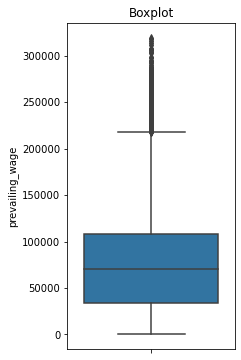

In [67]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=data['prevailing_wage'])
plt.title('Boxplot')

In [68]:
def outlier(df,variable):
    q1=df[variable].quantile(0.25)
    q3=df[variable].quantile(0.75)
    iqr=q3-q1
    up_limit=q3+1.5*iqr
    low_limit=q1-1.5*iqr
    return up_limit, low_limit

In [105]:
### calculate the number of numerical columns
num_col=[i for i in data.columns if data[i].dtypes!='O']
## converting to a dataframe
data_num=data[num_col] 
### delete the additionally created target vcariable
data_num.drop(['target'], axis=1, inplace=True) 

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
##Calling the outlier function for all variables
for i in data_num.columns:
    up_limit, low_limit=outlier(data_num, i)
    print (up_limit, low_limit)

7227.0 -2701.0
2048.5 1932.5
218315.56125000003 -76564.56875000002
75919.3825 -24155.324166666665


In [97]:
##checking the outlier for an individual variable
up_limit, low_limit=outlier(data_num, 'prevailing_wage')
print(up_limit, low_limit)

218315.56125000003 -76564.56875000002


In [85]:
# let's flag the outliers in the data set
outliers = np.where(data['prevailing_wage'] > up_limit, True,
                    np.where(data['prevailing_wage'] < low_limit, True, False))

In [86]:
##Calculate the total number of outliers
outliers.sum()

11733

In [98]:
# let's print 20 of them
outliers_df = data.loc[outliers, 'prevailing_wage']
outliers_df.head(20)

1      83425.65
2     122996.86
3      83434.03
4     149907.39
5      78252.14
10     83588.56
13    107196.03
14    220081.73
18    150441.13
19     79948.12
21    137694.98
23     90108.38
25     99489.65
26     86332.95
27    103029.33
29    189190.48
30     79594.12
31    135866.13
33     81921.18
34    225569.73
Name: prevailing_wage, dtype: float64

In [108]:
## to remove the outliers we can use
data.loc[~outliers, 'prevailing_wage']

0          592.2029
6        53635.3900
7          418.2298
8        74362.1900
9        67514.7600
            ...    
25470      516.4101
25471    75587.4200
25473    22845.5600
25474    51104.7800
25479    70876.9100
Name: prevailing_wage, Length: 13747, dtype: float64

In [106]:
# let's have a look at the values of those variables
# to get an idea of the feature magnitudes
data_num.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [107]:
# let's now calculate the range of the variables
data_num.max()-data_num.min()

no_of_employees    602095.0000
yr_of_estab           216.0000
prevailing_wage    319208.1333
dtype: float64